In [1]:
pwd

'/Users/kennethchen/GDrive_KPC/Udi_files/udi_codes'

In [1]:
# Import libraries

import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
from numpy.random import randn
from scipy import stats

%matplotlib inline

In [82]:
# open csv file
explore_data = open('clean_dataset_2_new.csv', encoding='utf-8')
# read file into list of lists
csv_explore_data = csv.reader(explore_data)
explore_data_lines = list(csv_explore_data)
column_names = explore_data_lines[0]

In [65]:
# make dataframe, assign row1 as column names and then drop row1 in the dataframe
explore_data_frame = pd.DataFrame(explore_data_lines, columns = column_names)
explore_data_frame = explore_data_frame.drop(index=0)

In [79]:
column_names

['subject_id',
 'redcap_repeat_instrument',
 'redcap_repeat_instance',
 'age_years',
 'sex',
 'hieght_cm',
 'weight',
 'charlson_comorbidity_index',
 'us_serial_num_udi',
 'date_udi_assessment',
 'thickness_ex_tidal',
 'thickness_in_tidal',
 'thickness_fraction_tidal',
 'excursion_tidal',
 'contraction_vmax',
 'relaxation_vmax',
 'acceleration_time',
 'relaxation_rate',
 'contraction_vti',
 'relaxation_vti',
 'vent_mode_udi',
 'fio2_udi',
 'o2_sat_pulsox_udi',
 'paralytics_udi',
 'hos_admission_date',
 'number_of_icu_stay',
 'day_mortality',
 'discharge_disposition',
 'date_of_death',
 'transfer_to_icu_date',
 'time_of_intubation_icu',
 'time_of_extubation_icu',
 'respiratory_status_at_24_h',
 'respiratory_status_at_48_h',
 'respiratory_status_at_72_h',
 'transfer_out_of_icu_date',
 'vent_day']

In [73]:
# first 5 rows of the data frame
explore_data_frame.head()

,subject_id,redcap_repeat_instrument,redcap_repeat_instance,age_years,sex,hieght_cm,weight,charlson_comorbidity_index,us_serial_num_udi,date_udi_assessment,...,discharge_disposition,date_of_death,transfer_to_icu_date,time_of_intubation_icu,time_of_extubation_icu,respiratory_status_at_24_h,respiratory_status_at_48_h,respiratory_status_at_72_h,transfer_out_of_icu_date,vent_day
1,3,ultrasound_measurements,1,26.404375175397167,1,170.18,65.5,3,1,2020-09-03 11:45,...,1,,2020-08-28,2020-08-28 14:04,2020-09-10 08:00,6,6,6,2020-09-23,6
2,4,ultrasound_measurements,1,35.00687899135506,1,165.1,84.7,1,1,2020-09-03 15:06,...,7,2020-10-25,2020-08-31,2020-08-28 15:29,,,,,,6
3,5,ultrasound_measurements,1,59.04022669870018,1,182.88,118.3,4,1,2020-09-11 16:10,...,7,2020-09-19,2020-09-09,2020-09-09 13:00,2020-09-13 12:00,2,2,1,2020-09-14,2
4,6,ultrasound_measurements,1,49.10162426333189,1,165.1,88.1,2,1,2020-09-11 15:07,...,7,2020-11-11,2020-08-26,2020-08-24 09:32,,,,,,18
5,7,ultrasound_measurements,1,61.624696833838705,2,165.1,72,2,1,2020-09-15 15:30,...,7,2020-09-26,2020-09-11,2020-09-10 09:42,,,,,,5


In [74]:
# data frame summary
explore_data_frame.describe()

,subject_id,redcap_repeat_instrument,redcap_repeat_instance,age_years,sex,hieght_cm,weight,charlson_comorbidity_index,us_serial_num_udi,date_udi_assessment,...,discharge_disposition,date_of_death,transfer_to_icu_date,time_of_intubation_icu,time_of_extubation_icu,respiratory_status_at_24_h,respiratory_status_at_48_h,respiratory_status_at_72_h,transfer_out_of_icu_date,vent_day
count,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
unique,18,1,1,18,2,9,18,8,1,18,...,5,9,15,17,8,5,5,4,7,12
top,10,ultrasound_measurements,1,36.19786853939506,1,165.1,70.9,4,1,2020-11-17 16:15,...,7,,2020-10-08,,,,,,,6
freq,1,18,18,1,12,4,1,4,18,1,...,8,10,2,2,11,11,13,14,12,4


In [151]:
small_df = pd.DataFrame(explore_data_frame, columns =["vent_day", "age_years", "sex", "hieght_cm", "weight","charlson_comorbidity_index"]).dropna()


1     0.100
2     0.230
3     0.300
4     0.270
5     0.195
6     0.135
7     0.275
8     0.190
9     0.280
10    0.175
11    0.260
12    0.215
13    0.240
14    0.140
15    0.195
16    0.220
Name: thickness_ex_tidal, dtype: float64

In [85]:
# covert appropriate columns to numeric data type
explore_data_frame["age_years"] = pd.to_numeric(explore_data_frame["age_years"])
explore_data_frame["hieght_cm"] = pd.to_numeric(explore_data_frame["hieght_cm"])
explore_data_frame["weight"] = pd.to_numeric(explore_data_frame["weight"])
explore_data_frame["thickness_ex_tidal"] = pd.to_numeric(explore_data_frame["thickness_ex_tidal"])
explore_data_frame["thickness_in_tidal"] = pd.to_numeric(explore_data_frame["thickness_in_tidal"])
explore_data_frame["thickness_fraction_tidal"] = pd.to_numeric(explore_data_frame["thickness_fraction_tidal"])
explore_data_frame["excursion_tidal"] = pd.to_numeric(explore_data_frame["excursion_tidal"])
explore_data_frame["contraction_vmax"] = pd.to_numeric(explore_data_frame["contraction_vmax"])
explore_data_frame["relaxation_vmax"] = pd.to_numeric(explore_data_frame["relaxation_vmax"])
explore_data_frame["acceleration_time"] = pd.to_numeric(explore_data_frame["acceleration_time"])
explore_data_frame["relaxation_rate"] = pd.to_numeric(explore_data_frame["relaxation_rate"])
explore_data_frame["contraction_vti"] = pd.to_numeric(explore_data_frame["contraction_vti"])
explore_data_frame["relaxation_vti"] = pd.to_numeric(explore_data_frame["relaxation_vti"])
explore_data_frame["fio2_udi"] = pd.to_numeric(explore_data_frame["fio2_udi"])
explore_data_frame["o2_sat_pulsox_udi"] = pd.to_numeric(explore_data_frame["o2_sat_pulsox_udi"])
explore_data_frame["number_of_icu_stay"] = pd.to_numeric(explore_data_frame["number_of_icu_stay"])
explore_data_frame["vent_day"] = pd.to_numeric(explore_data_frame["vent_day"])


Text(0, 0.5, 'thickness in cm')

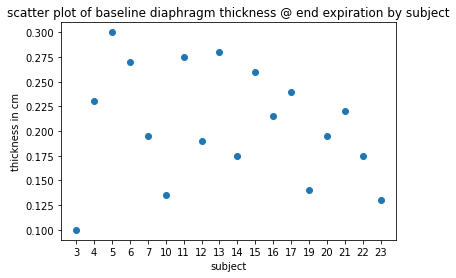

In [168]:
plt.scatter(explore_data_frame["subject_id"], explore_data_frame["thickness_ex_tidal"])

plt.title('scatter plot of baseline diaphragm thickness @ end expiration by subject')
plt.xlabel('subject')
plt.ylabel('thickness in cm')

Text(0, 0.5, 'thickness in cm')

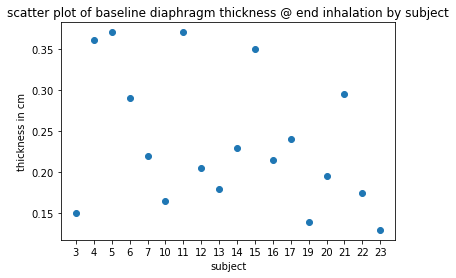

In [89]:
plt.scatter(explore_data_frame["subject_id"], explore_data_frame["thickness_in_tidal"])

plt.title('scatter plot of baseline diaphragm thickness @ end inhalation by subject')
plt.xlabel('subject')
plt.ylabel('thickness in cm')

Text(0, 0.5, 'thickness fractional change %')

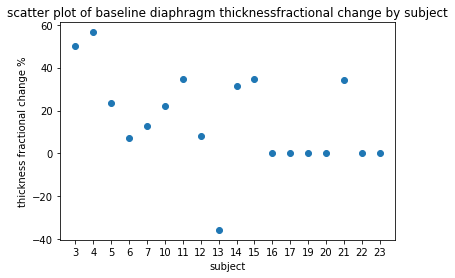

In [169]:
plt.scatter(explore_data_frame["subject_id"], explore_data_frame["thickness_fraction_tidal"])

plt.title('scatter plot of baseline diaphragm thicknessfractional change by subject')
plt.xlabel('subject')
plt.ylabel('thickness fractional change %')

Text(0, 0.5, 'excursion distance in cm')

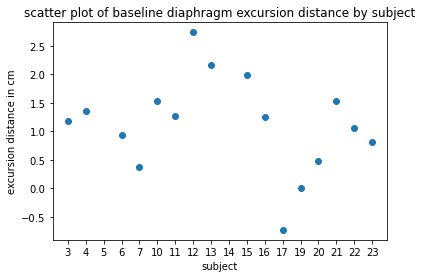

In [170]:
plt.scatter(explore_data_frame["subject_id"], explore_data_frame["excursion_tidal"])

plt.title('scatter plot of baseline diaphragm excursion distance by subject')
plt.xlabel('subject')
plt.ylabel('excursion distance in cm')

Text(-5.950000000000003, 0.5, 'thickness in cm')

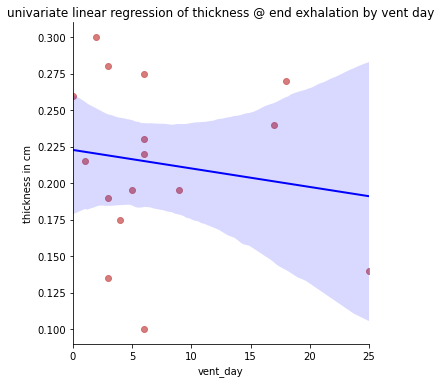

In [101]:
sns.lmplot(x = "vent_day", y = "thickness_ex_tidal", data = explore_data_frame, scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 2, "color": "blue"})

plt.title('univariate linear regression of thickness @ end exhalation by vent day')
plt.xlabel('vent_day')
plt.ylabel('thickness in cm')

Text(0.42499999999999716, 0.5, 'thickness in cm')

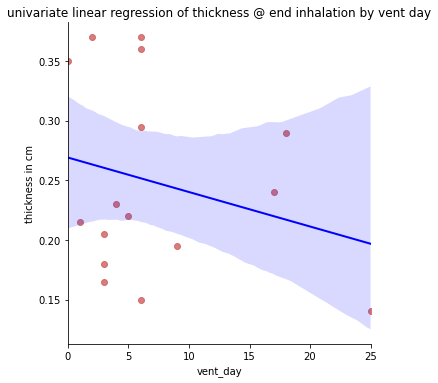

In [102]:
sns.lmplot(x = "vent_day", y = "thickness_in_tidal", data = explore_data_frame, scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 2, "color": "blue"})

plt.title('univariate linear regression of thickness @ end inhalation by vent day')
plt.xlabel('vent_day')
plt.ylabel('thickness in cm')

Text(1.6749999999999972, 0.5, 'thickness in cm')

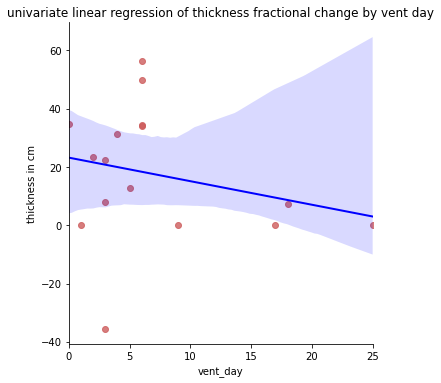

In [112]:
sns.lmplot(x = "vent_day", y = "thickness_fraction_tidal", data = explore_data_frame, scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 2, "color": "blue"})

plt.title('univariate linear regression of thickness fractional change by vent day')
plt.xlabel('vent_day')
plt.ylabel('thickness in cm')

Text(8.049999999999997, 0.5, 'excursion distance in cm')

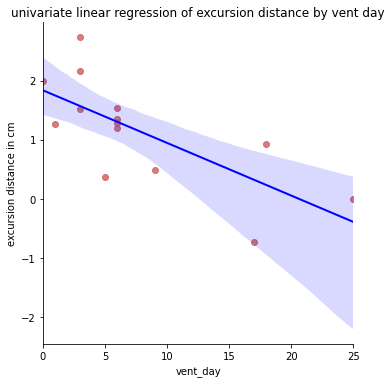

In [171]:
sns.lmplot(x = "vent_day", y = "excursion_tidal", data = explore_data_frame, scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 2, "color": "blue"})

plt.title('univariate linear regression of excursion distance by vent day')
plt.xlabel('vent_day')
plt.ylabel('excursion distance in cm')

In [130]:
# Set up X as vent day
X = explore_data_frame.vent_day

# Use v to make X two-dimensional
X = np.vstack(explore_data_frame.vent_day)

# Set up Y as the target price of the houses.
Y = explore_data_frame.thickness_ex_tidal

# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

X = X.astype(float)

In [138]:
X = X[0:16]
Y = Y[0:16]

In [136]:
# Now get out m and b values for our best fit line
m, b= np.linalg.lstsq(X, Y)[0]

<ipython-input-136-1645b0053855>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, b= np.linalg.lstsq(X[0:16], Y[0:16])[0]


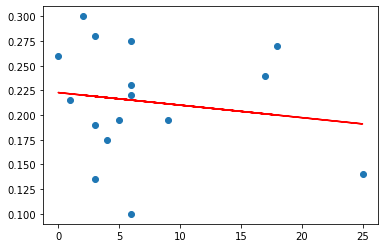

In [135]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(explore_data_frame.vent_day,explore_data_frame.thickness_ex_tidal,'o')

# Next the best fit line
x= explore_data_frame.vent_day
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [139]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 0.05 


<ipython-input-139-20582ca7d176>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [140]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [154]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [155]:
# Data Columns
X_multi = pd.DataFrame(explore_data_frame, columns =["vent_day", "age_years", "sex", "hieght_cm", "weight","charlson_comorbidity_index"]).dropna()

# Targets
Y_target = explore_data_frame.thickness_ex_tidal[0:len(X_multi)]

In [156]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression()

In [157]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 1.08 
 The number of coefficients used was 6 


In [166]:
# Set a DataFrame from the Features
coeff_df = pd.DataFrame(["vent_day", "age_years", "sex", "hieght_cm", "weight","charlson_comorbidity_index"])

coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,vent_day,-0.003297
1,age_years,0.000996
2,sex,-0.068876
3,hieght_cm,-0.005869
4,weight,0.002438
5,charlson_comorbidity_index,0.001616


In [ ]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,explore_data_frame.thickness_ex_tidal[0:len(X)])